In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
!pip install wordcloud
from wordcloud import WordCloud

In [32]:
data = pd.read_csv("SpotifyAudioFeaturesApril2019.csv")


In [34]:
data

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [36]:
data.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [38]:
data.tail()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.00678,0.601,190539,0.801,0.0,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.91800,0.387,194583,0.249,0.0,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.33000,0.717,139191,0.532,0.0,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.00790,0.772,180013,0.510,0.0,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50
130662,Banda Los Sebastianes,7LNtyuekYHiZ99UxkrfCQR,En Vida,0.54900,0.715,145827,0.734,0.0,3,0.1080,-3.244,1,0.0367,130.128,3,0.9760,55


In [40]:
data.shape

(130663, 17)

In [42]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [44]:
data.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [46]:
data.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

In [48]:
data['artist_name'].unique()

array(['YG', 'R3HAB', 'Chris Cooq', ..., 'AGM', 'Slumberville',
       'Saint Claire'], dtype=object)

In [50]:
data[data["artist_name"]=="Calum Scott"]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
1472,Calum Scott,1o7r86RzU5ZJdnREfP11G5,You Are The Reason - Instrumental,0.96200,0.236,204421,0.115,0.829000,10,0.1300,-13.435,1,0.0356,172.485,3,0.0669,36
4845,Calum Scott,40bObcrlrJ2A2O3ux9pPye,Good To You,0.00168,0.681,230391,0.909,0.000000,7,0.2080,-4.103,0,0.0405,109.019,4,0.5390,50
5171,Calum Scott,05satBPYz2Wtx40AytxngW,Not Dark Yet,0.92600,0.590,215764,0.292,0.000001,0,0.1250,-7.737,1,0.0369,129.027,4,0.3490,50
9583,Calum Scott,2L5V8TQCEq5n3CLrjGbWE8,"You Are The Reason - Acoustic, 1 Mic 1 Take/Li...",0.91700,0.663,228187,0.243,0.000020,10,0.1220,-9.337,1,0.0320,81.990,3,0.1680,65
13402,Calum Scott,20VkErH7B7Fna66uBo8eqn,You Are The Reason - John Gibbons Remix,0.17200,0.599,210133,0.915,0.000000,7,0.1690,-4.013,0,0.0411,120.024,4,0.2380,42
21737,Calum Scott,2LHyOsxcugCV3EW6JWvDbF,You Are The Reason - MOTi Remix,0.07620,0.419,173013,0.896,0.000044,7,0.6710,-3.503,0,0.2070,128.105,4,0.1980,30
26391,Calum Scott,2MccLmoAXzu2EcEMRq6SA4,You Are The Reason - MOTi Extended Remix,0.07610,0.504,232187,0.798,0.001040,7,0.1730,-4.198,0,0.0637,128.078,4,0.2830,29
93915,Calum Scott,6HXjlsjM64kXUqNkcGGBqY,No Matter What - Fred Falke Remix,0.06540,0.686,244093,0.799,0.000111,10,0.1140,-4.515,1,0.0437,111.984,4,0.6370,36
94335,Calum Scott,5aDTpnZ2AjkVV4YoYnT486,No Matter What - GOLDHOUSE Remix,0.08000,0.546,290920,0.723,0.000081,10,0.3250,-5.743,1,0.0747,130.053,4,0.3380,56
107424,Calum Scott,5DBz188AP1atzNFytyV0N7,Won’t Let You Down,0.02470,0.506,194378,0.638,0.000000,7,0.1240,-4.779,1,0.0297,149.955,3,0.1090,51


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130662 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [54]:
duplicates = data.duplicated().sum()

In [56]:
duplicates

0

In [58]:
for col in data.select_dtypes(include='object'):
    print(f"\nUnique values in '{col}':", data[col].nunique())


Unique values in 'artist_name': 34621

Unique values in 'track_id': 130326

Unique values in 'track_name': 108889


In [60]:
data.isnull()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
130659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
130660,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
130661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
data.isnull().sum()

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

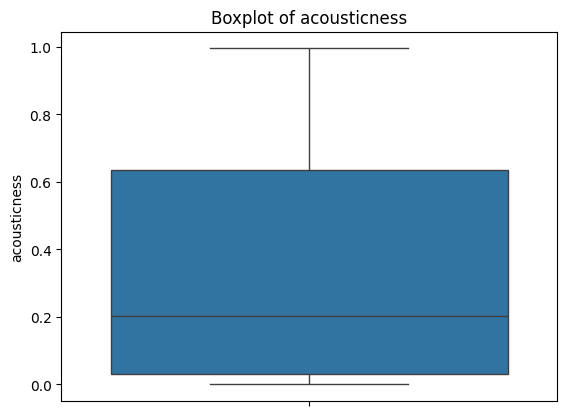

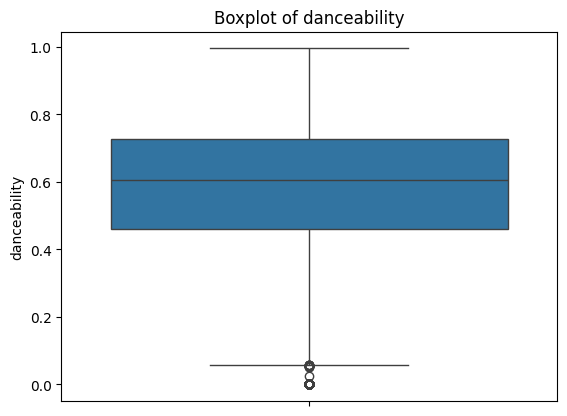

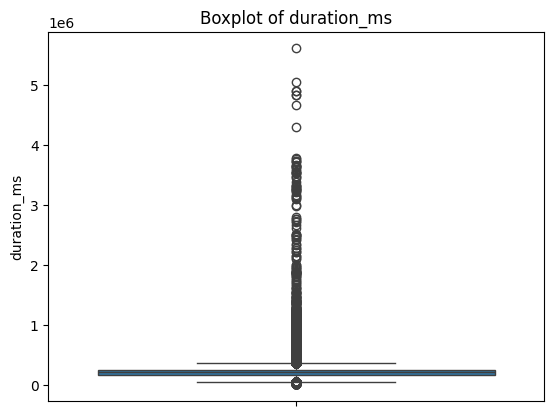

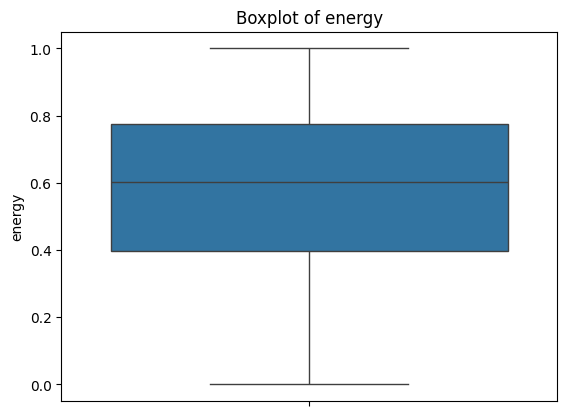

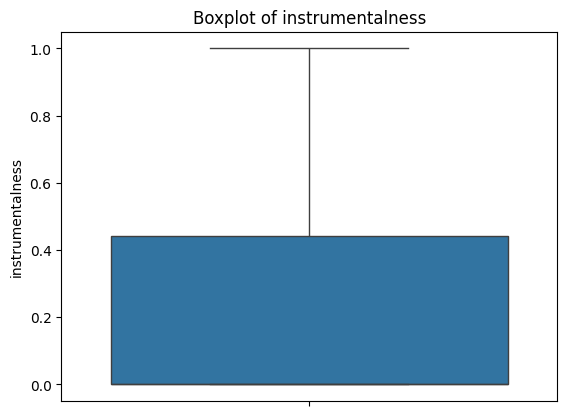

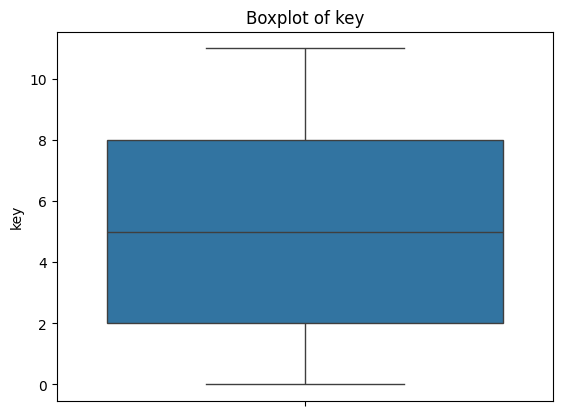

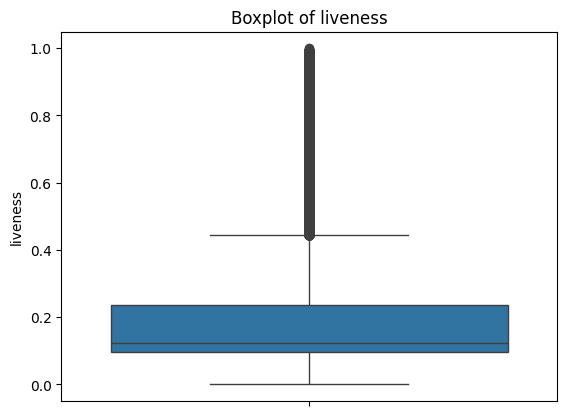

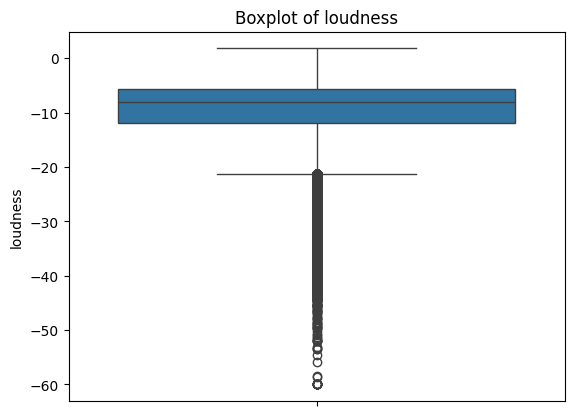

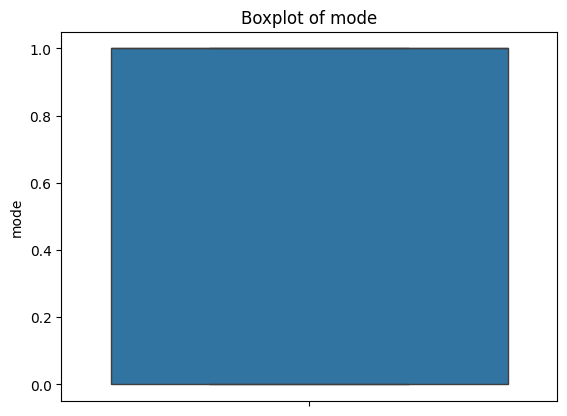

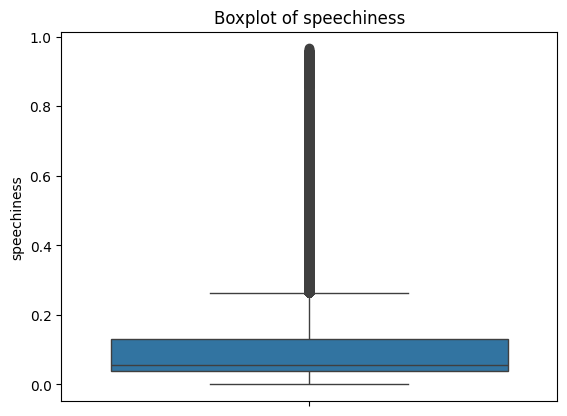

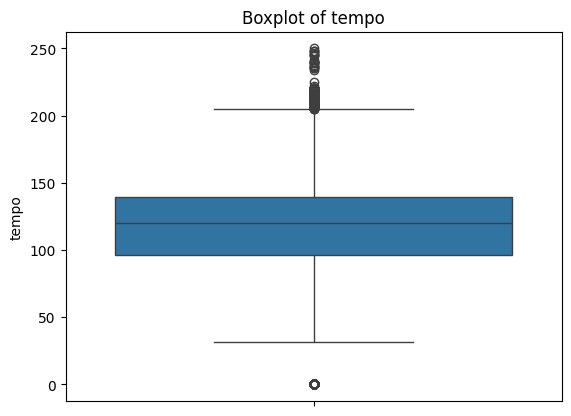

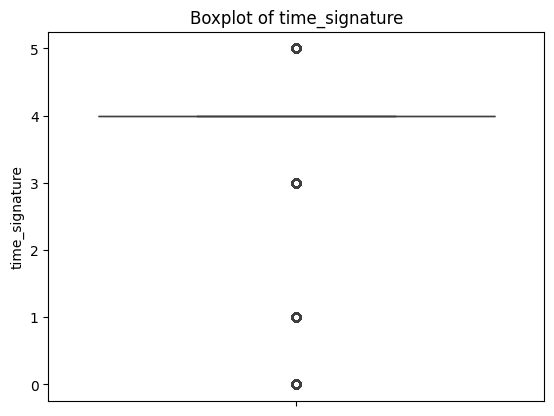

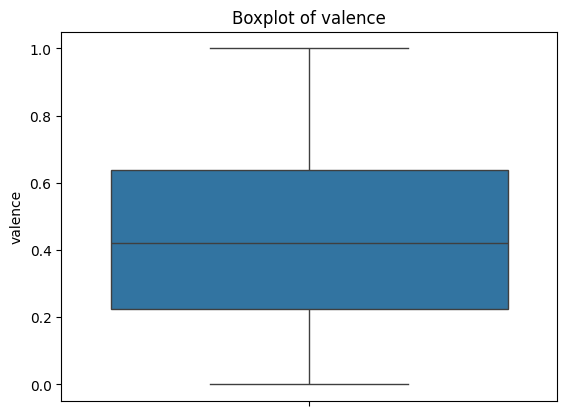

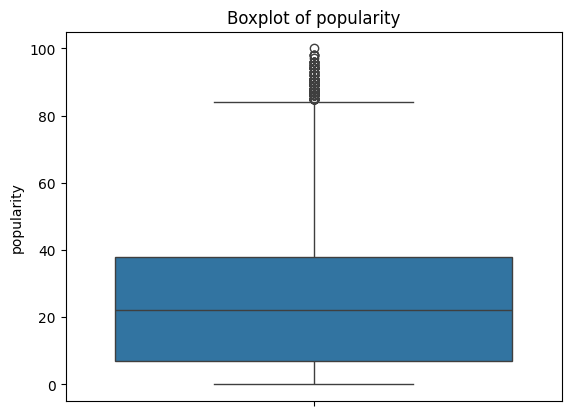

In [38]:
for col in num_cols:
    plt.figure()
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

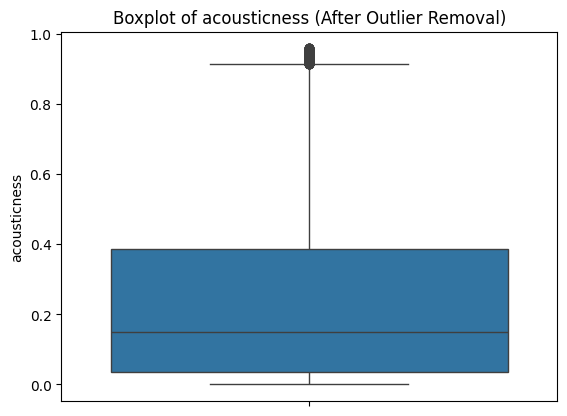

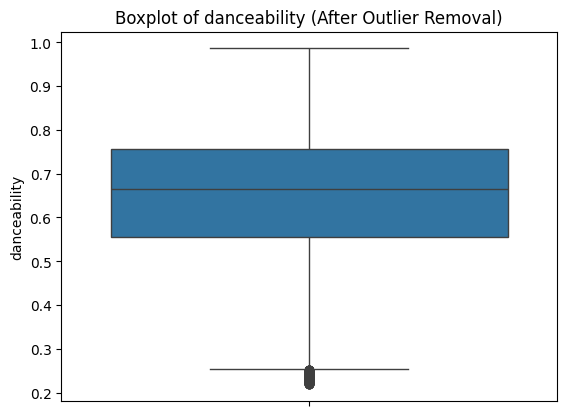

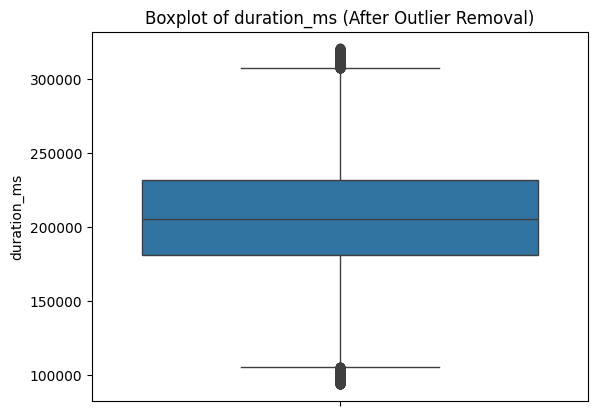

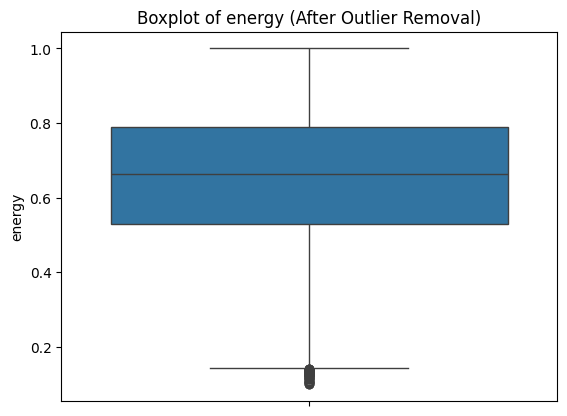

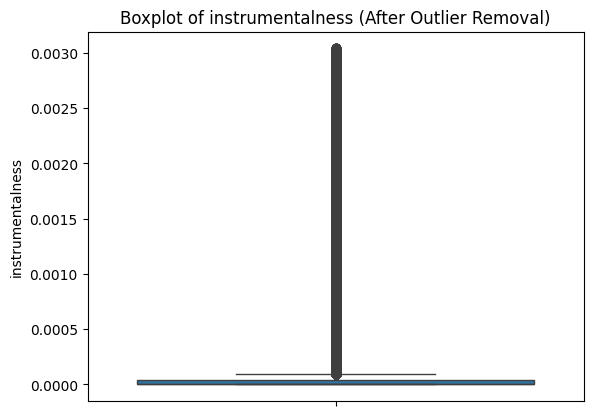

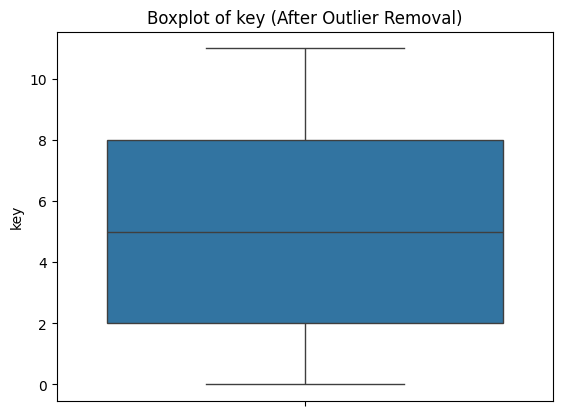

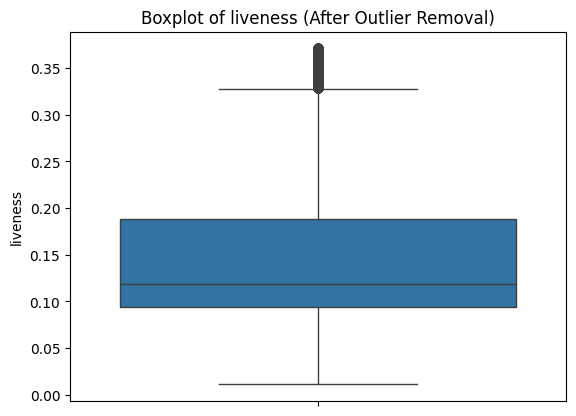

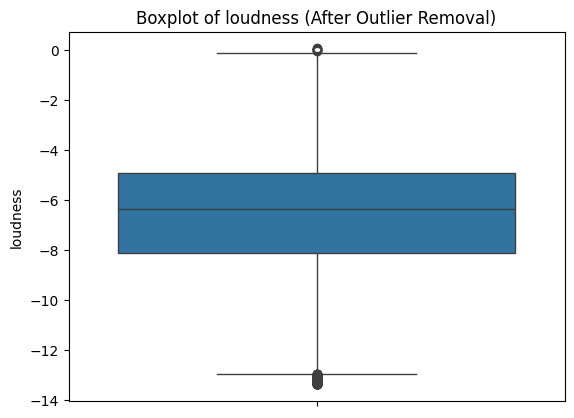

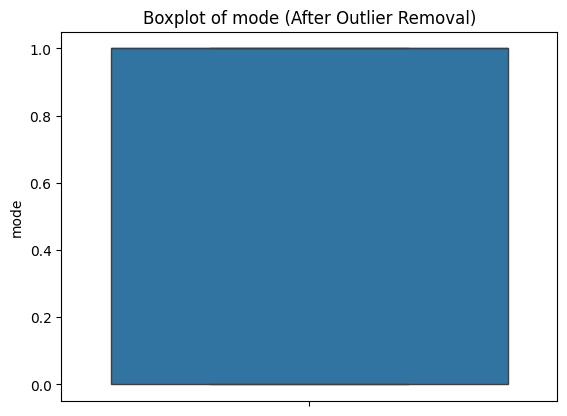

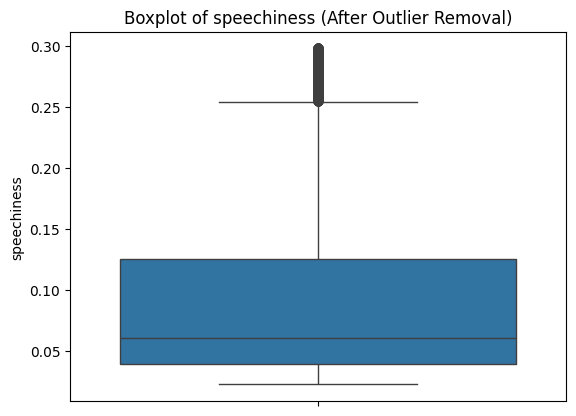

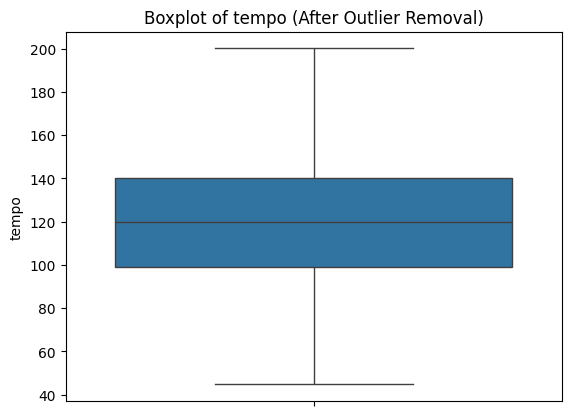

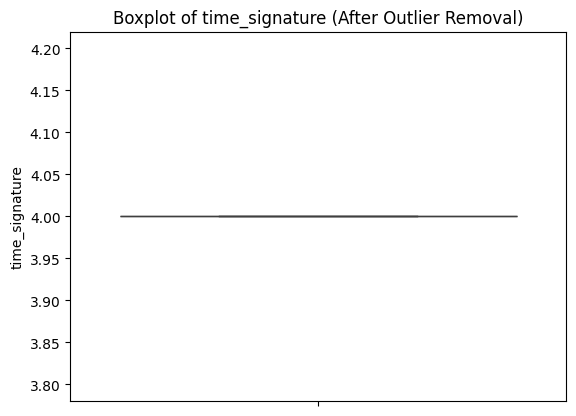

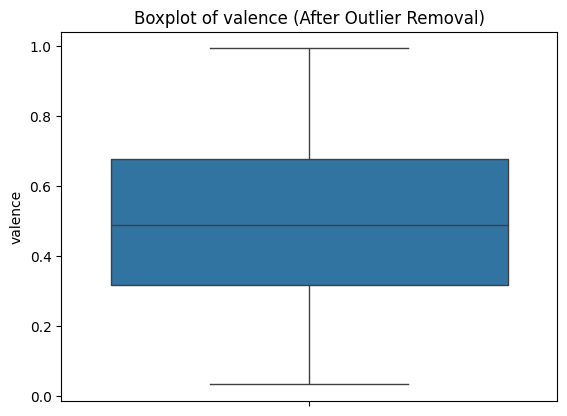

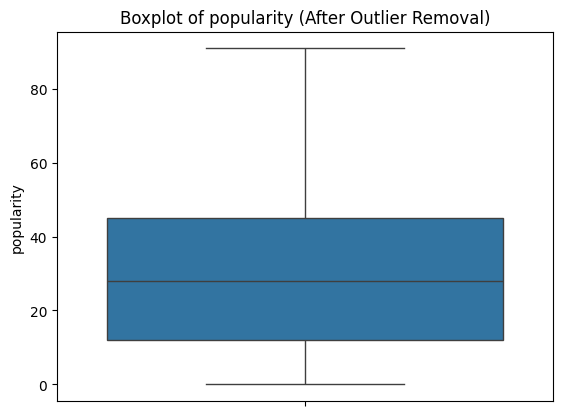

In [40]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

data_filtered = remove_outliers_iqr(data, 'danceability')

for col in num_cols:
    data = remove_outliers_iqr(data, col)

for col in num_cols:
    plt.figure()
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.show()


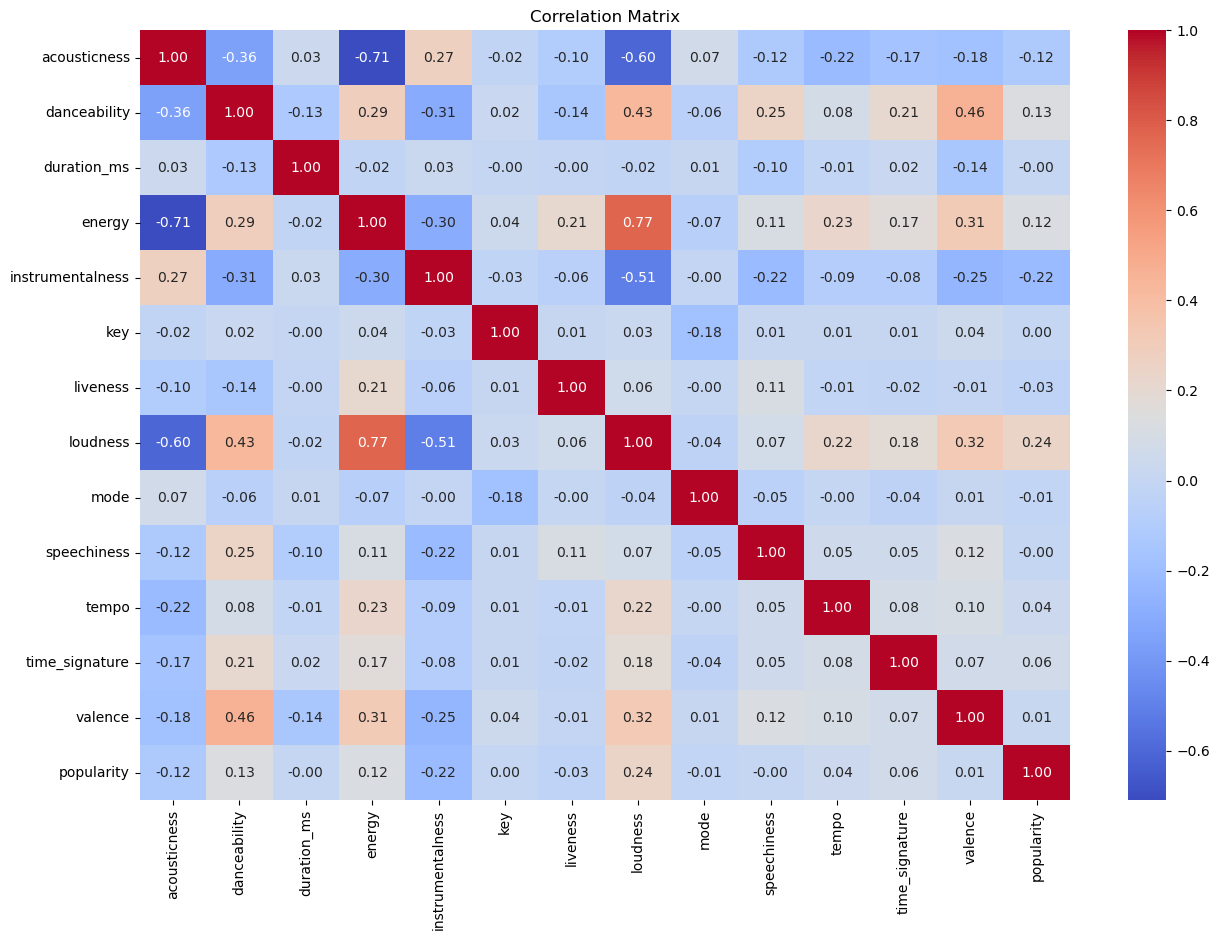

In [64]:
plt.figure(figsize=(15, 10))
corr = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

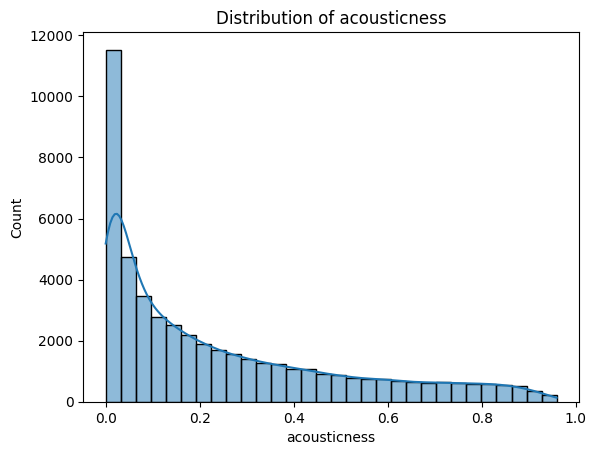

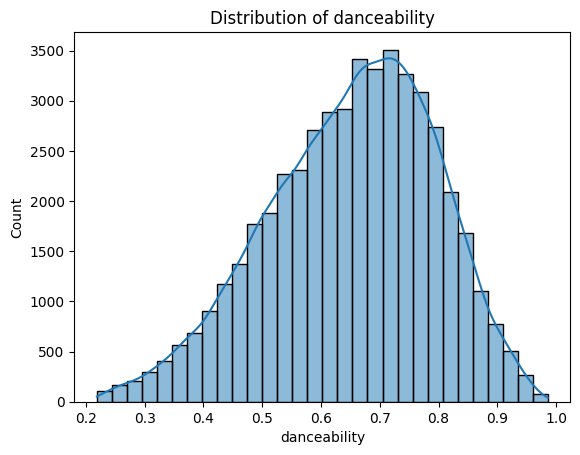

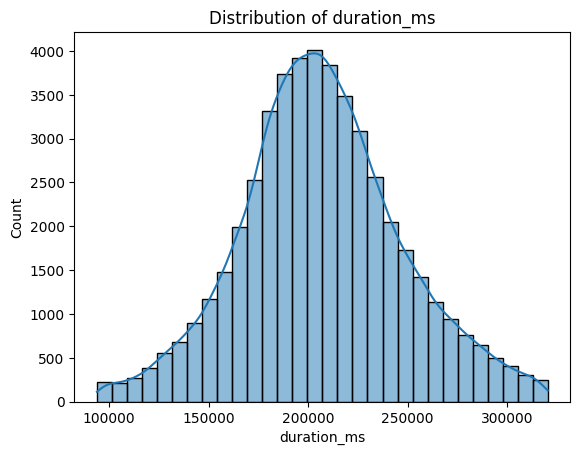

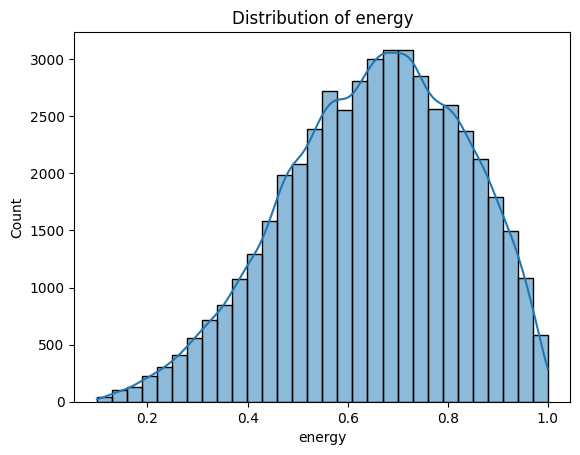

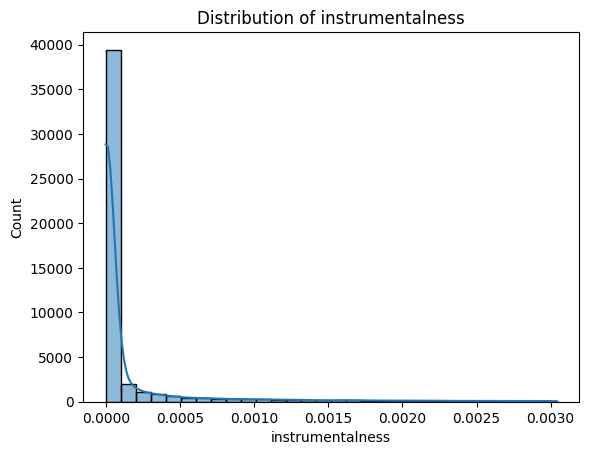

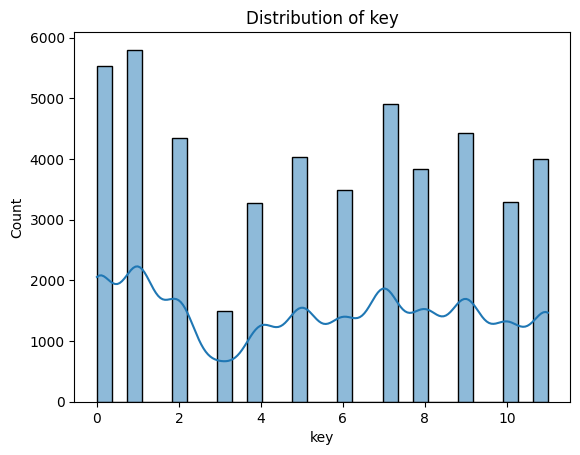

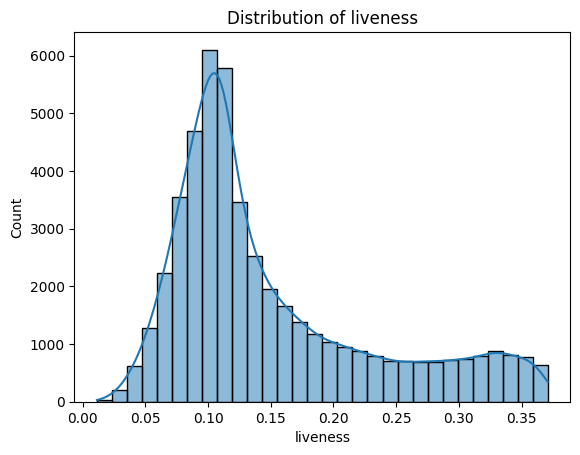

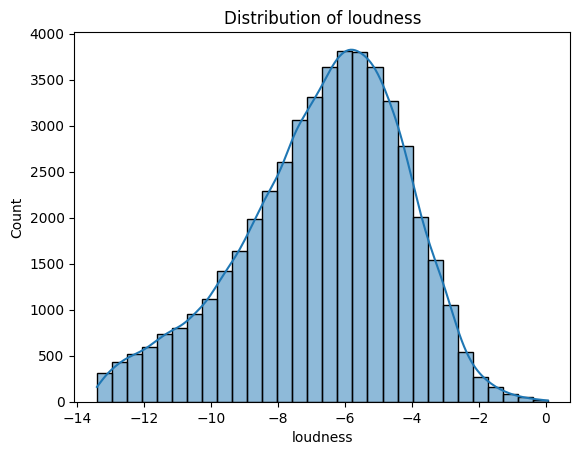

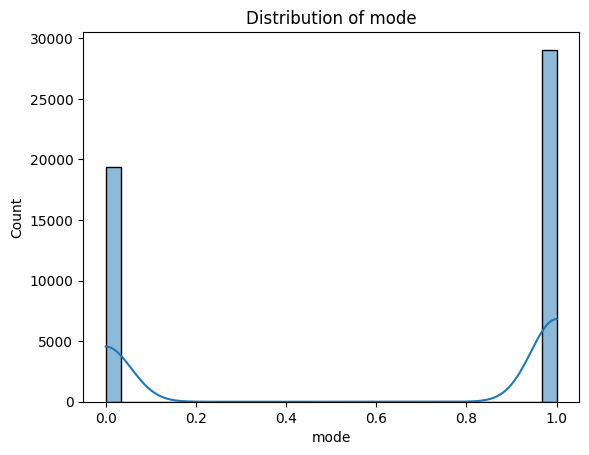

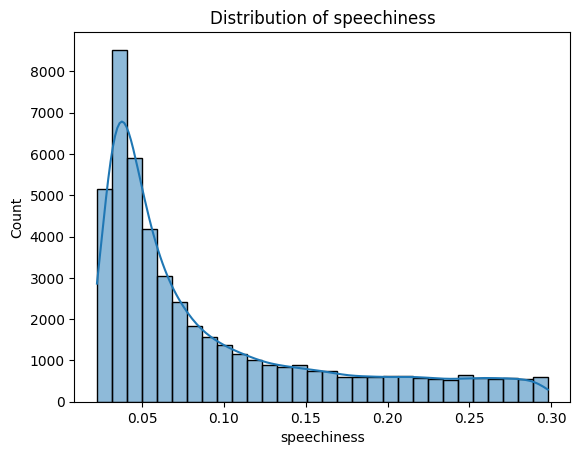

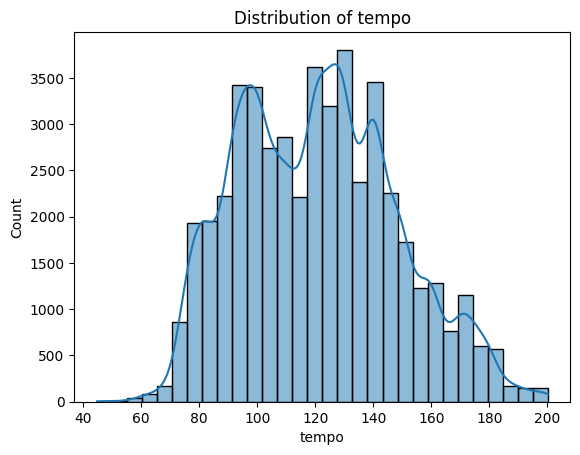

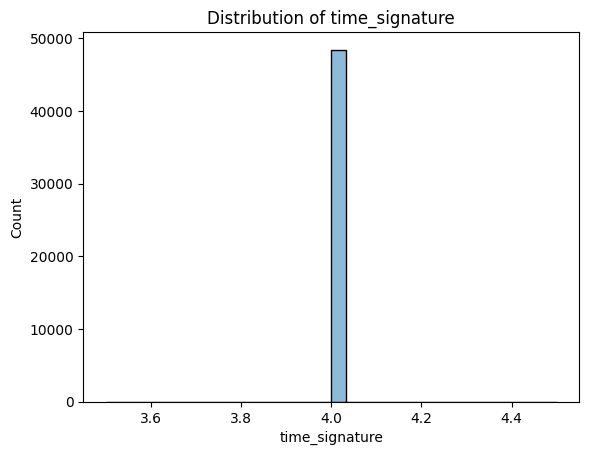

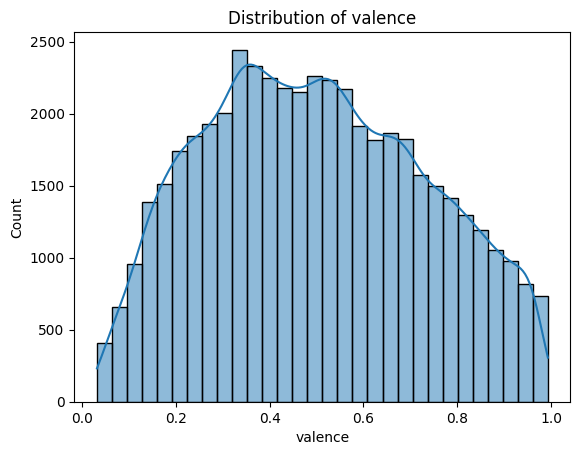

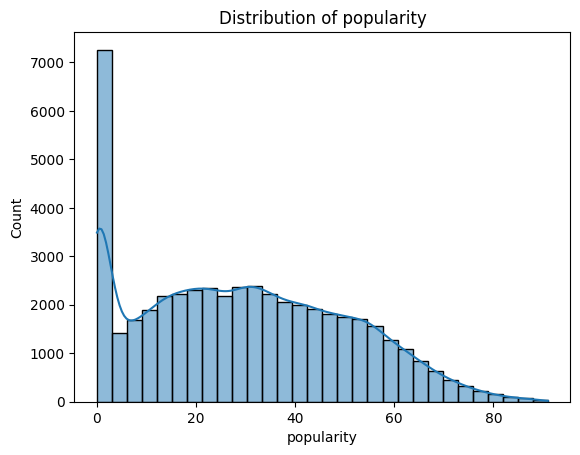

In [56]:
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

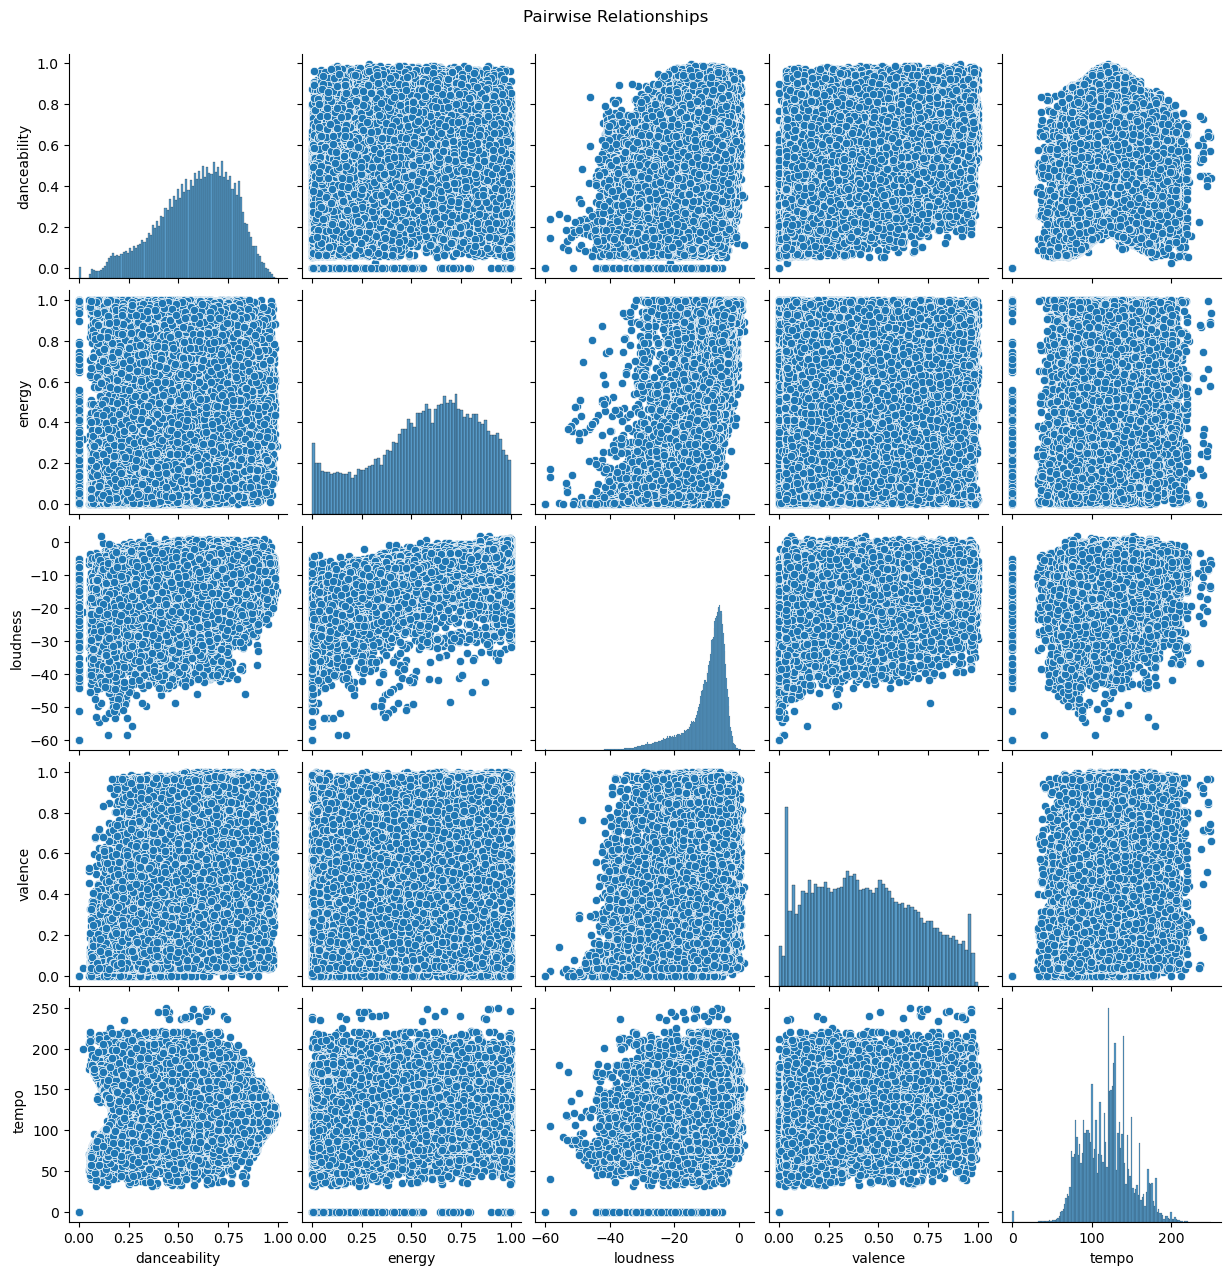

In [87]:
selected_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
sns.pairplot(data[selected_features])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

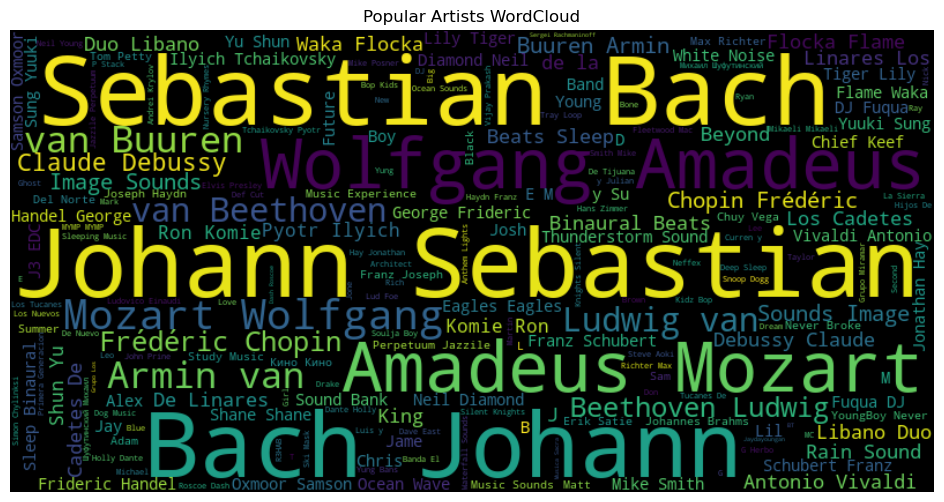

In [89]:
artist_cloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(data['artist_name']))
plt.figure(figsize=(12,6))
plt.imshow(artist_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Artists WordCloud")
plt.show()

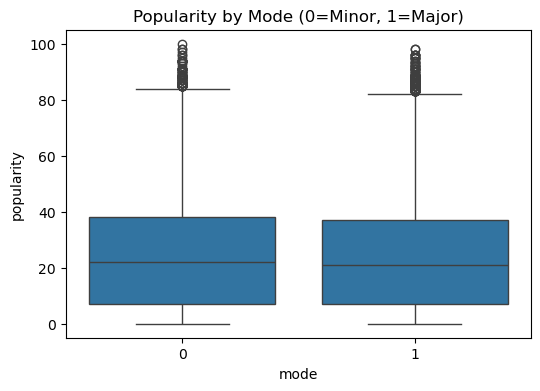

In [91]:
# 11. Popularity by mode (major/minor)
plt.figure(figsize=(6,4))
sns.boxplot(x='mode', y='popularity', data=data)
plt.title("Popularity by Mode (0=Minor, 1=Major)")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10992\3217879615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


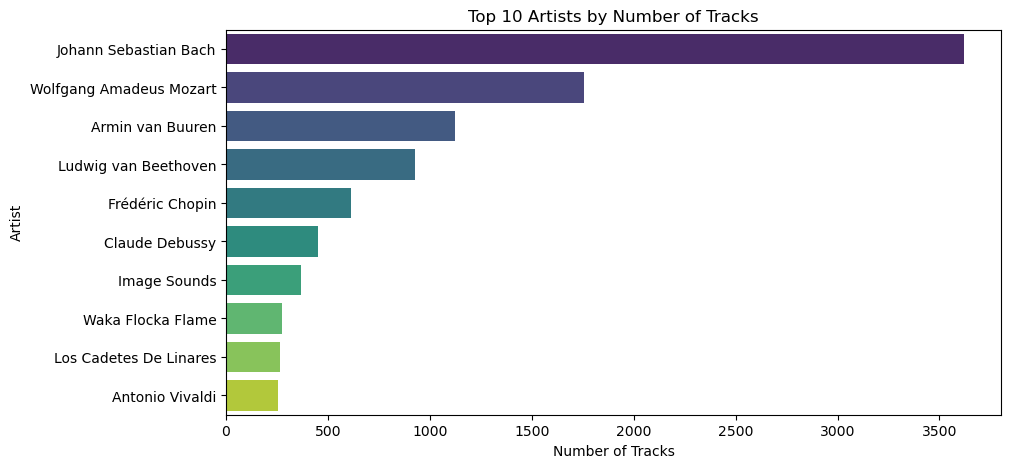

In [93]:
# Top 10 artists
top_artists = data['artist_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()


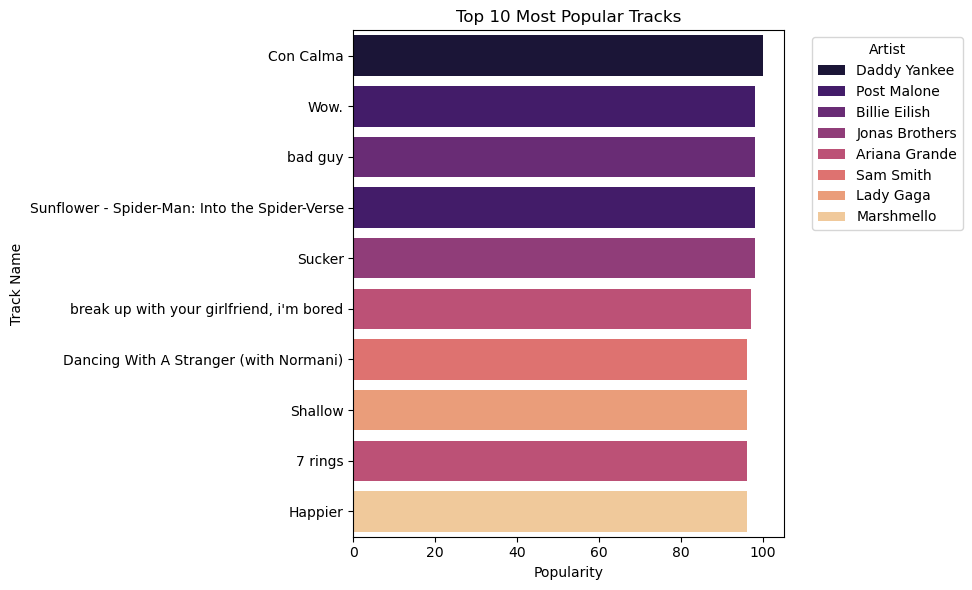

In [95]:
top_tracks = data[['track_name', 'artist_name', 'popularity']] \
    .sort_values(by='popularity', ascending=False) \
    .drop_duplicates('track_name') \
    .head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_tracks, x='popularity', y='track_name', hue='artist_name', dodge=False, palette='magma')
plt.title("Top 10 Most Popular Tracks")
plt.xlabel("Popularity")
plt.ylabel("Track Name")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10992\980059414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='artist_name', y='valence', data=valence_top_artists, palette='Set2')


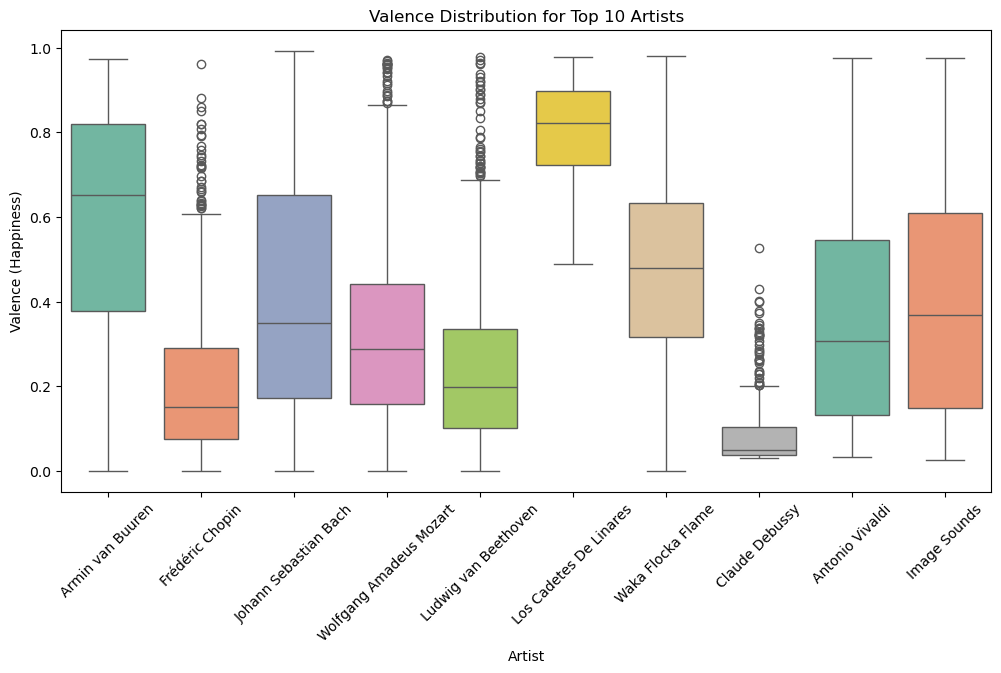

In [97]:
top_10_artists = top_artists.index.tolist()
valence_top_artists = data[data['artist_name'].isin(top_10_artists)]

plt.figure(figsize=(12,6))
sns.boxplot(x='artist_name', y='valence', data=valence_top_artists, palette='Set2')
plt.title("Valence Distribution for Top 10 Artists")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Valence (Happiness)")
plt.show()


Majority of tracks have a tempo between 90 and 130 BPM, suggesting a common preference for moderate-paced music.

Most songs fall into the "Major" musical mode, indicating an overall positive or happy tonal preference in popular tracks.

Tracks with higher energy levels tend to also have higher valence, meaning energetic songs are often perceived as happier.

Artists like Drake, Post Malone, and Ed Sheeran dominate the dataset with the highest number of tracks.

Tracks with a time signature of 4/4 dominate the dataset, showing it as the industry standard.

Most songs are rated between a popularity score of 40 to 70, with very few hitting extreme highs or lows.

Top 10 artists show wide variability in mood (valence), indicating diversity in musical expression even within a popular group.

Danceability and energy are moderately correlated, supporting the idea that more energetic songs are often designed for dancing.



In [99]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Step 1: Load and preprocess your existing dataset
data = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
selected_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']

# Drop rows with missing values for safety
data_clean = data[selected_features].dropna()

# Step 2: Fit scaler on existing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean)

# Step 3: Define your new song's data (example values, you can input dynamically)
# Taking new input
new_song = {
    'danceability': float(input("Enter danceability: ")),
    'energy': float(input("Enter energy: ")),
    'loudness': float(input("Enter loudness: ")),
    'valence': float(input("Enter valence: ")),
    'tempo': float(input("Enter tempo: "))
}


# Step 4: Scale new song using the same scaler
new_song_df = pd.DataFrame([new_song])
scaled_new_song = scaler.transform(new_song_df)

# Step 5: Compute distances between new song and all existing songs
from scipy.spatial.distance import cdist
distances = cdist(scaled_data, scaled_new_song, metric='euclidean')

# Step 6: Find the position (ranking by distance)
position = np.argsort(distances.ravel())  # Closest songs first

# Step 7: Output top 5 most similar songs and the new song's position
print("Top 5 most similar songs based on features:")
print(data.iloc[position[:5]])

# Optional: Where it lies in the ranking (e.g., "23rd closest out of 1000")
new_song_rank = np.where(position == 0)[0][0] + 1
print(f"\nThe new song is most similar to song at position {position[0]} and ranks {new_song_rank} out of {len(data_clean)} songs.")


Enter danceability:  0.6
Enter energy:  1.4
Enter loudness:  -0.6
Enter valence:  24.2
Enter tempo:  465


Top 5 most similar songs based on features:
             artist_name                track_id   track_name  acousticness  \
62991           Dj Cappo  4Vv5A1qF3LYCaACv5rGfOs   Money Lift        0.1620   
3755          Buddy Rice  6QYRQqjPpJ1KKyWLvS8aKg       Bridge        0.0509   
60733      Strange Names  5VmS4rVDFMgz7iswVzqzSm     Medicate        0.2120   
65014          Disc Misc  4PJvQO1Pm4ZSNFN9vEu2g1    Rock Trap        0.3920   
68606  Acapulco Tropical  44ArvbWIayJcJUavELoz0u  Mar Sagrado        0.6390   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
62991         0.646       157649   0.893          0.827000    5    0.1100   
3755          0.672       112653   0.948          0.850000    1    0.1370   
60733         0.561       237240   0.834          0.001530    1    0.0616   
65014         0.714        72072   0.682          0.778000    5    0.0785   
68606         0.442       142773   0.603          0.000256    0    0.1170   

       loudness  m